In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from cascid.datasets.isic import database, images
from cascid.image.image_preprocessing import adaptive_hair_removal2, color_quantization

2022-11-03 10:13:07.090687: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 10:13:07.294110: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-03 10:13:07.923544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dell/anaconda3/envs/dell/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-03 10:13:07.923641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_

In [2]:
df = database.get_df()
df

,isic_id,sex,diagnostic,age_approx,image_url,img_id
0,ISIC_4327928,female,MEL,55,https://content.isic-archive.com/d361a1ec-eb19...,ISIC_4327928.jpg
1,ISIC_5608178,male,MEL,60,https://content.isic-archive.com/f2c041e9-24dd...,ISIC_5608178.jpg
2,ISIC_0757631,male,MEL,25,https://content.isic-archive.com/17a0b05d-2c9d...,ISIC_0757631.jpg
3,ISIC_4735590,female,MEL,55,https://content.isic-archive.com/ec25917c-1a3e...,ISIC_4735590.jpg
4,ISIC_2814689,female,MEL,25,https://content.isic-archive.com/39295c46-ff28...,ISIC_2814689.jpg
...,...,...,...,...,...,...
10573,ISIC_0055773,male,BCC,85,https://content.isic-archive.com/70ca88ce-e074...,ISIC_0055773.jpg
10574,ISIC_0055772,male,BCC,85,https://content.isic-archive.com/110efd1d-9044...,ISIC_0055772.jpg
10575,ISIC_0055768,male,BCC,75,https://content.isic-archive.com/1ebbf87a-fa04...,ISIC_0055768.jpg
10576,ISIC_0055766,male,BCC,85,https://content.isic-archive.com/c90c441a-0d21...,ISIC_0055766.jpg


(15, 256, 256, 3)


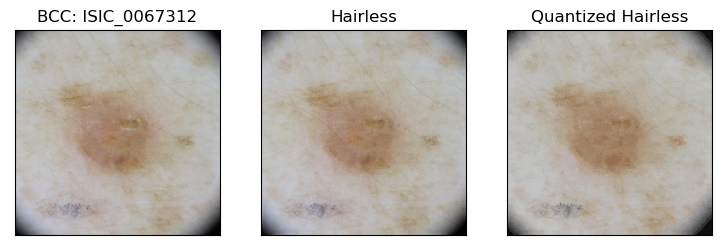

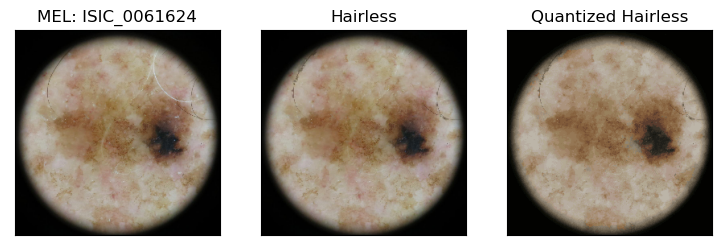

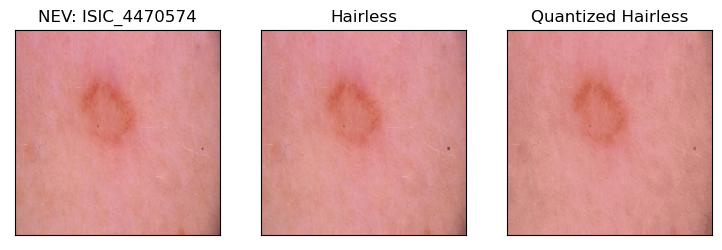

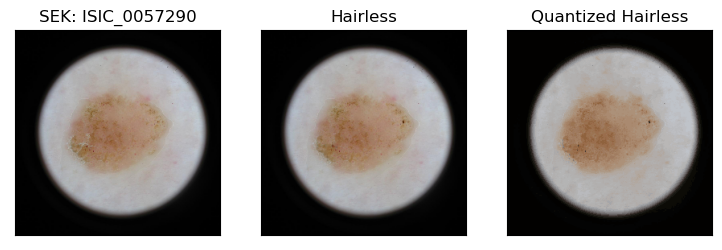

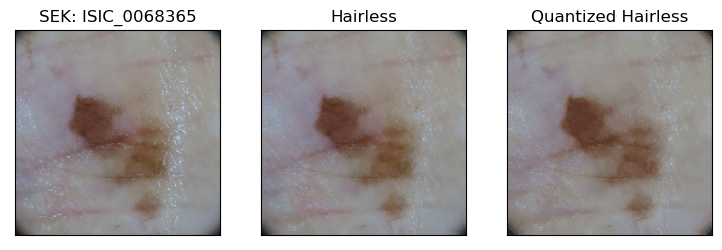

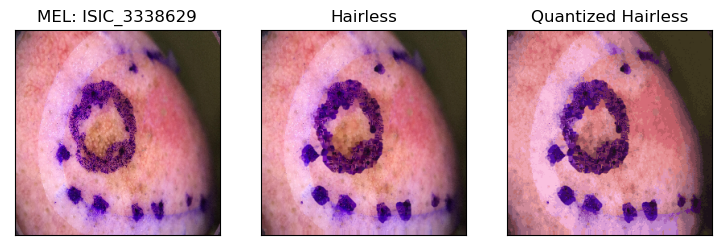

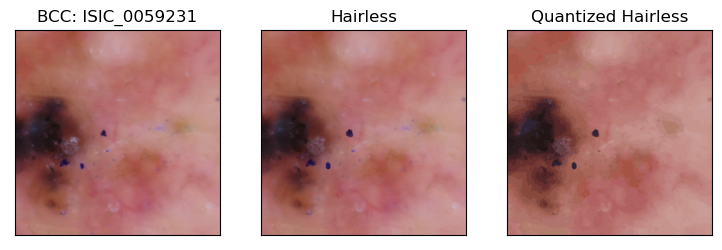

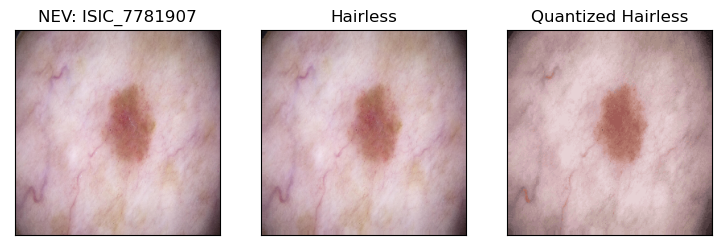

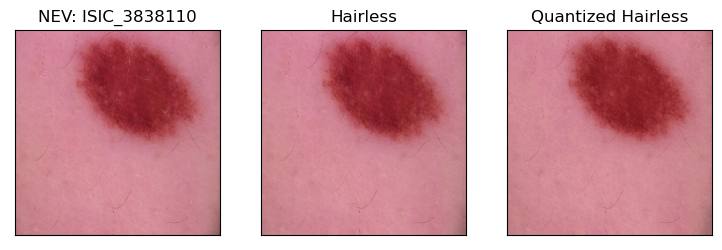

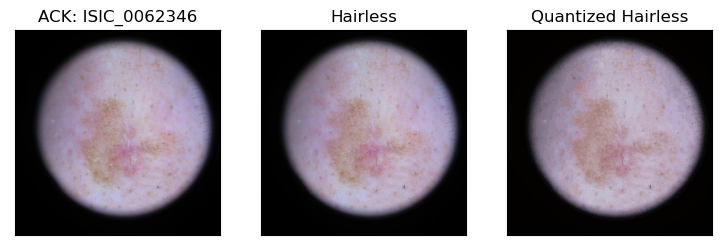

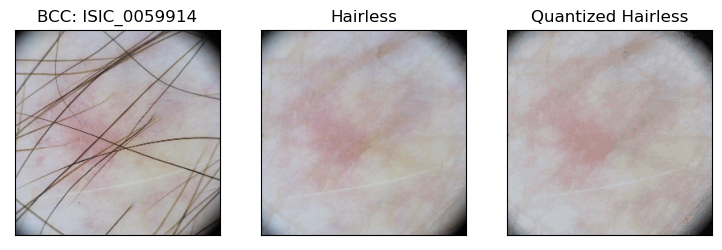

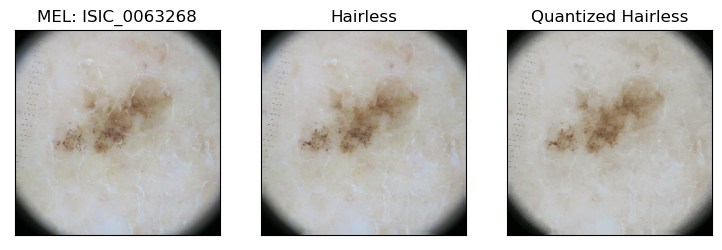

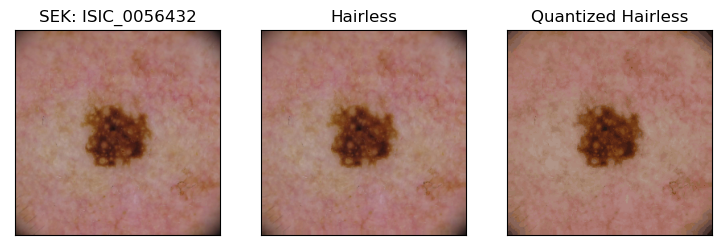

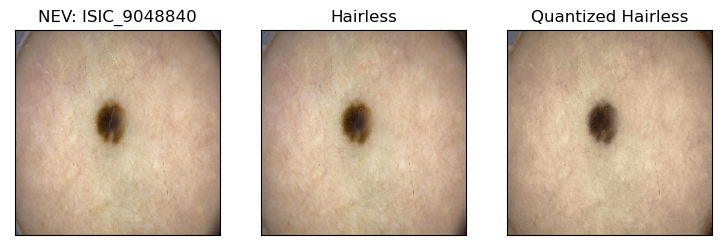

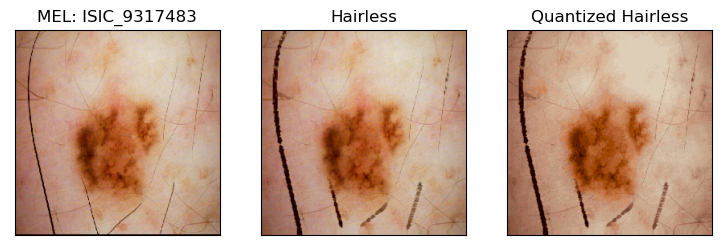

In [3]:
N = 15
sample = df.sample(N)
imgs = list(map(lambda i: images.get_raw_image(i, image_shape=(256, 256)), sample['img_id']))
imgs = np.array([imgs[i] for i in range(len(imgs))])
print(imgs.shape)

for i, row in sample.iterrows():
    fig = plt.figure(figsize=(9,3))
    ax = fig.add_subplot(1,3,1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax2 = fig.add_subplot(1,3,2)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax3 = fig.add_subplot(1,3,3)
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    # Original
    img = images.get_raw_image(row['img_id'], image_shape=(256,256))
    ax.imshow(img)
    ax.set_title("{}: {}".format(row['diagnostic'], row['isic_id']))
    # Hairless
    hairless = adaptive_hair_removal2(img)
    ax2.imshow(hairless)
    ax2.set_title("Hairless")
    # Quantized Hairless
    qh = color_quantization(hairless, k=32)
    ax3.imshow(qh)
    ax3.set_title("Quantized Hairless")
    
    fig.show()

In [6]:
from cascid.datasets.isic.images import remove_hair_and_quantize
imlist = df['img_id'].to_list()
remove_hair_and_quantize(imlist)